In [1]:
%matplotlib inline
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
import sklearn.metrics as metrics

In [4]:
data =  pd.read_csv('data/Evaluation.csv', sep = '\t', encoding='utf-8')

In [17]:
data_2014 = pd.read_csv('data/Final_Full.csv', sep = '\t', encoding='utf-8')

In [18]:
data_2014.shape

(133419, 84)

In [19]:
data_2014.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Athlete', 'Subscription', 'Month',
       'gender', 'sport', 'SegmentName', 'Duration', 'EventsAttended',
       'EventsAttended_Frequency', 'EventsAttended_LastDate',
       'EventsAttended_Recency', 'Hits', 'Hits_Frequency', 'Hits_LastDate',
       'Hits_Recency', 'Hprofileview', 'Hcoachimport', 'Hmessage',
       'Hsearchhit', 'HNULL', 'Hcoacheval', 'Hvideoview', 'Hemailopen',
       'Emails', 'Emails_Frequency', 'Emails_LastDate', 'Emails_Recency',
       'EAthlete newsletter', 'Eathlete_new', 'Eathlete_new_info_request',
       'ECCNote', 'ECCNote_camp', 'Ecoach_list_known_updated',
       'ECoachEmailOpen', 'ECoachEval', 'ECoachImport', 'ECoachSearchHit',
       'ECoachVideoViewHit', 'ECoachVisit', 'Ecolleges_going_to_the_event',
       'Efailed_subscription', 'Ehighlight_video__regathlete_11',
       'Ehighlight_video__regathlete_2', 'Ehighlight_video__regathlete_4',
       'EEmailsDigest', 'Eparent_new', 'Eparent_welcome',
       'Epost_eve

In [7]:
final_2014 = data[data['NumYear']==2014]

In [8]:
final_2014.shape

(66285, 3680)

In [10]:
final_2014.to_csv('data/Data_2014.csv', sep='\t', encoding='utf-8')

In [16]:
final_2014['CaptainU_CHURN'].head(5)

26    0
27    0
28    0
29    0
30    1
Name: CaptainU_CHURN, dtype: int64

In [32]:
y_2014 = final_2014['CaptainU_CHURN']

In [34]:
three_months = final_2014[(final_2014['NumMonth']==1) | (final_2014['NumMonth']==2) | (final_2014['NumMonth']==3)]

In [35]:
forth_month = final_2014[(final_2014['NumMonth']==4)]

In [36]:
y_three = three_months['CaptainU_CHURN']

In [37]:
y_four = forth_month['CaptainU_CHURN']

In [68]:
len(forth_month)

4653

In [39]:
three_months.drop(['CaptainU_CHURN'], axis = 1, inplace = True)

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
forth_month.drop(['CaptainU_CHURN'], axis = 1, inplace = True)

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
three_months.drop(['Unnamed: 0','Efailed_subscription'], axis = 1, inplace = True)

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
forth_month.drop(['Unnamed: 0','Efailed_subscription'], axis = 1, inplace = True)

/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
from sklearn import tree

In [90]:
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=7, criterion='entropy')
clf = clf.fit(three_months,y_three )

In [91]:
prediction_dt = clf.predict(forth_month)

In [92]:
confusion_matrix(y_four, prediction_dt)

array([[4372,    0],
       [ 281,    0]])

In [94]:
metrics.recall_score(y_four, prediction)

0.0

In [43]:
import pydotplus 

In [46]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf")

True

In [47]:
from IPython.display import Image

In [64]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=three_months.columns,    
                         filled=True, rounded=True,
                         special_characters=True)  

In [65]:
graph = pydotplus.graph_from_dot_data(dot_data)

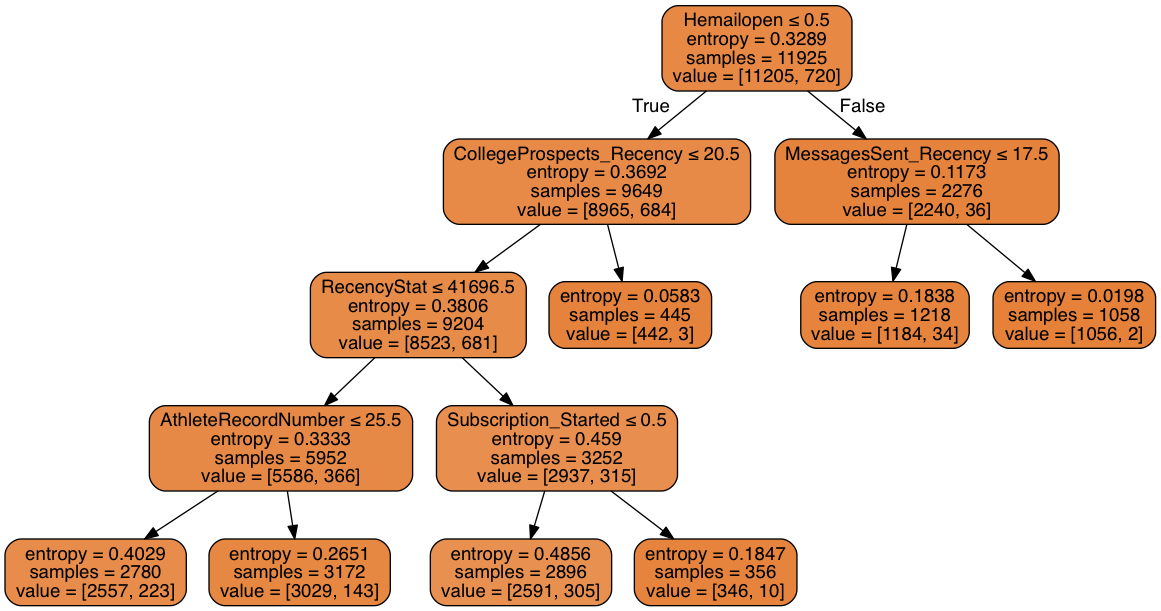

In [66]:
Image(graph.create_png())  

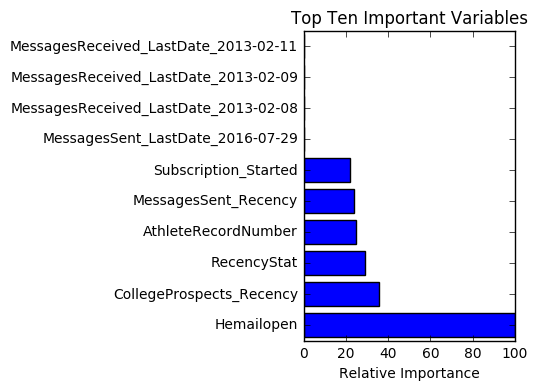

In [67]:
feature_importance = clf.feature_importances_
#print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
#print(len(feature_importance))
#print(feature_importance)
sorted_idx = np.argsort(feature_importance)[::-1][:10]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, three_months.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top Ten Important Variables')
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression

In [72]:
logic = LogisticRegression(penalty='l1')

In [73]:
logic.fit(three_months,y_three)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
prediction_lg = logic.predict(forth_month)

In [96]:
confusion_matrix(y_four, prediction_lg)

array([[4370,    2],
       [ 281,    0]])

In [83]:
metrics.recall_score(y_four, prediction)

0.0

In [20]:
.3289-((9649/11925*.3692)-(2276/11925*.1173))

0.052553165618448694